In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer
import ELPH_Dim_Reducer
import ELPH_VAR_Transformer

from ELPH_RDNLVAR import RDNLVAR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# runs = runs[::1]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [15]:
model = RDNLVAR()

optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.5)
scaler = ELPH_Scaler.normalize_scaler(0.1)
dim_reducer = ELPH_Dim_Reducer.SVD()
VAR_transformer = ELPH_VAR_Transformer.polynomial_features(order=2)

train_kwargs = {'rdim':20, 'prdim':20, 'n_VAR_steps':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler, 'dim_reducer':dim_reducer, 'VAR_transformer':VAR_transformer }

mean_scores_std,mean_scores_max,all_scores_std,all_scores_max = ELPH_utils.get_KFold_CV_scores_all_scores(model, runs, folds=10, seed=817, train_kwargs=train_kwargs)

print(np.mean(mean_scores_std))
print(np.std(mean_scores_std))
print(mean_scores_std)
print('\n')
print(np.mean(mean_scores_max))
print(np.std(mean_scores_max))
print(mean_scores_max)

0.006301407495053644
0.00025405018525841584
[0.006173575266304291, 0.006634931745289515, 0.006180783225428957, 0.006440094866535035, 0.005861643150854404, 0.006012989301670523, 0.00645957024028072, 0.00660999608931473, 0.006528237371417504, 0.006112253693440757]


0.03138361624470426
0.002105578814348602
[0.028106786149112238, 0.03563708403808016, 0.030341330715815396, 0.03121182545971371, 0.03216227589359763, 0.030246046572936915, 0.030332470166853, 0.034503543572099706, 0.03117932445644998, 0.030115475422383877]


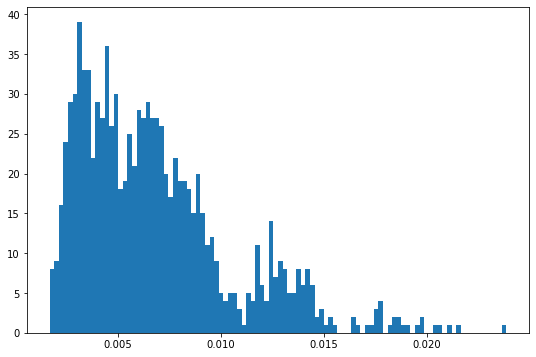

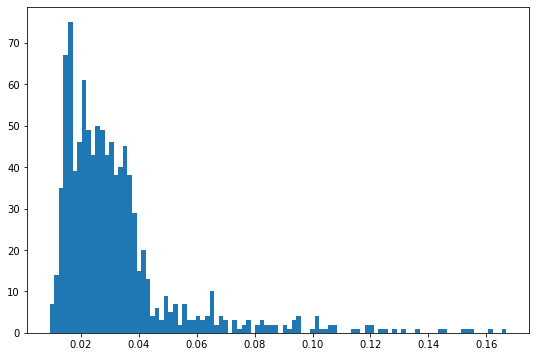

In [12]:

plt.hist(all_scores_std, bins=100)
plt.show()

plt.hist(all_scores_max, bins=100)
plt.show()

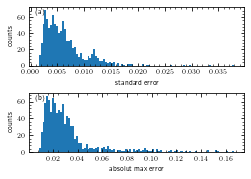

In [17]:
####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.hist(all_scores_std, bins=100)

plt.xlabel(r'standard error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.001))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.hist(all_scores_max, bins=100)

plt.xlabel(r'absolut max error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.008))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.savefig('/home/agluedge/Preprints/ELPH/figs/pred_error_statistics.pdf')
plt.show()